<img src="logo.png" alt="Jupyter">
<h2 style="text-align: center;">What is Jupyter?</h2> 

## <span style="color: #8B6508;">Ju</span>lia <span style="color: #8B6508;">Pyt</span>hon and <span style="color: #8B6508;">R</span>

*"The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modelling, machine learning and much more."* [(from the Jupyter project homepage)](http://jupyter.org/)

A Jupyter notebook consists of a series of cells which can contain formatted text or code. Students
can use it as a laboratory notebook in which they document their activities, analyse their data and present their results. In a course like 175.318 Experimental Psychology (or perhaps even a methods course like
175
.203) a Jupyter notebook could form part of the assessment. 

Jupyter is based on the **client-server** model, so you interact with it via a web browser. The Jupyter server may be on the same machine as the browser or on a remote machine.

Jupyter supports many different programming languages but the main ones are:

* **Julia:** Popular for numerical analysis.
* **Python:** An interactive, easy to learn general purpose language. Rapidly becoming *the* language for scientific computing.
* **R:** A powerful statistical computing and graphics language.


<h2 style="text-align: center;">What's so great about Python?</h2>

* "A **C** program is like a fast dance on a newly waxed dance floor by people carrying razors." - Waldi Ravens.
* "**C++**: Hard to learn and built to stay that way." - anon.
* "**Java** is, in many ways, C++--." - Michael Feldman.
* "**Perl** – The only language that looks the same before and after RSA encryption." - Keith Bostic.
* "And now for something completely different" - Monty Python

Python is a readable, interactive, high level language (named after Monty Python - not the snake). You can do a lot in only a few lines of code. The really neat thing about Python are the open source libraries (Python calls them packages) that are available for scientific computing. Some particularly useful ones are:

* **NumPy:** "Numerical Python" This package gives Python a MATLAB-like syntax for handling vectors and matrices. Anyone familiar with MATLAB will be at home with NumPy. MATLAB is great software but a single user license is *NZD$3,350*! [(source)](https://au.mathworks.com/pricing-licensing.html). NumPy is free.

* **SciPy:** "Scientific Python" Contains *lots* of mathematical functions. In particular, the SciPy package includes a [statistics module](https://docs.scipy.org/doc/scipy-0.18.1/reference/stats.html)
(large Python packages are organised into smaller *modules*).

* **Matplotlib:** A comprehensive MATLAB-like plotting library capable of producing [publication quality plots](http://matplotlib.org/gallery.html).

* **Pandas:** A package of data analysis tools. Pandas lets you import, clean and analyse large data frames.

* **PsychoPy:** A psychophysics toolbox written in Python.It is a free alternative to Presentation or E-Prime. It comes with PsychoPy Builder which allows psychophysics experiments to be created with a drag-and-drop interface similar to E-Prime.

Python can therefore be used to implement an experiment, reduce the data, perform statistical analyses
and present the results. In the past researchers might have used E-Prime to implement the experiment, hack the raw data into shape using Excel and analyse it using SPSS.

<h2 style="text-align: center;">A Quick Taste of Python</h2> 

In [1]:
# This is a Python code cell. Python ignores lines that start with a '#' 

# Ok, lets start with a list. Lists are contained in square brackets []. Here we define a list
# and assign it to the variable animals:

animals = ["Cat", "Dog", "Pangolin", "Panamanian Three Toed Sloth"]
print(animals)


['Cat', 'Dog', 'Pangolin', 'Panamanian Three Toed Sloth']


In [2]:
# We retrieve list elements via their index (position) in the array:

print(animals[3])

Panamanian Three Toed Sloth


In [3]:
# Note that Python, like most programming languages (except R, sigh...), counts from zero, not one.

# We can add to our list using the append() method:

animals.append("Wombat")
print(animals)

['Cat', 'Dog', 'Pangolin', 'Panamanian Three Toed Sloth', 'Wombat']


In [4]:
# We can loop through a list (or other collection) using the FOR command:

for animal in animals:
    print(animal)
    
#
#     Notice the clean English like syntax of Python. 
#
#     For comparison this is what the above looks like in C++ :
#
#     std::list<String>::const_iterator iterator;
#     for (iterator = animals.begin(); iterator != animals.end(); ++iterator) {
#        std::cout << *iterator << std::endl;
#     }
#


Cat
Dog
Pangolin
Panamanian Three Toed Sloth
Wombat


In [5]:
# Lists can contain any kind of data, including other lists. Python's other main data structure is the
# dictionary. Dictionaries are a collection of key-value pairs and are surrounded by curly braces {}.
# They are a rather like records in a database.
# Keys are always text but values can be anything (including lists and other dictionaries):

person = {
    "first_name": "Joe",
    "last_name": "Smith",
    "pets": animals
}

print(person['first_name'])
print(person['pets'])

# Note that I used the animals list as a value. Being able to freely nest lists and dictionaries
# allows for complex data structures to be constructed.

Joe
['Cat', 'Dog', 'Pangolin', 'Panamanian Three Toed Sloth', 'Wombat']


<h2 class="center">A Real Life Example - Analysing EMG Data at Manawatu</h2>

The Biopak EMGs used at Albany and Manawatu are efectively multichannel chart recorders - they measure voltage versus time across several channels.

<img src="face.jpg" alt="Face" width="320" height="260" style="float: right; padding-left: 2em;">

In the following example data was recorded from the **zygomaticus** and **corrugator** muscles.

As well as the two data channels, eight channels have been used for *event marking*. Each time
a stimulus appears the event marker channels are briefly pulsed with a pattern of highs and lows indentifying what sort of trial it is. The highs and lows can be considered to be 1's and 0's and can thus be interpreted as a binary number.

One way to analyse EMG data is to measure a *baseline* EMG level just prior to the stimulus (the RMS of 500ms of pre-stimulus data might be typical) then record one or more post-stimulus intervals after a suitable delay (to allow the subject time to react). These post-stimulus measurements can then be normalised by dividing by the baseline (absolute EMG voltages can vary widely for many spurious reasons and are not terribly useful in isolation).

The EMG typically samples at 1kHz across 10+ channels so it is easy for a single subject to generate 50-100MB of data. The two data files we are about to analyse are about 70MB each.

To automate the process I have written a Python module whose main purpose is to analyse a list of subject files against a *configuration file*. Every experiment is different and requires a configuration file to tell Python what channel is used for what purpose, what the event codes are, what intervals to use, what the sampling rate was, etc. the good news is that we just learned about Python lists and dictionaries and that is how the configuration file works. 

[config](http://it053760:8888/edit/EMG/config/malc.json)

In [6]:
# First we need to import the EMG analysis module:
import jupyter_emg_utils as emg
# here I have aliased it to 'emg' - which is quicker to type!

# The dir() command will tell us what goodies this module contains:
dir(emg)

['EmgException',
 'MAX_CODE',
 'MAX_ITERATIONS',
 'MAX_TOLERANCE',
 'THRESHOLD',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'analyse_data',
 'analyse_event',
 'analyse_events',
 'analyse_file',
 'analyse_file_list',
 'csv',
 'describe',
 'detect_all_codes',
 'detect_all_edges',
 'determine_rms',
 'fast_detect_edges',
 'get_code_edges',
 'get_interval',
 'io',
 'json',
 'load_config',
 'load_data',
 'np',
 'os',
 'pprint',
 'process_rms_list',
 'progress_callback',
 'time']

In [7]:
# The configuration file is called malc.json and is in a sub-folder called "config":
config = r".\config\malc.json"

# The list of subject files we are going to analyse are in a sub-folder called "data:
files = [r".\data\P7.mat", r".\data\P3.mat"]

# It was initially intended that the analysis would be done in SPSS so we specify a file to
# write SPSS friendly data to:
spss_file = "junk.csv"

# The analysis is complex and it can give feedback on how it is progressing. We will give it a
# "callback" function to talk to while it grinds through the data. It will just print to the screen
# but it could log to a file etc.

def log(message):
    print(message)

# Then we analyse the data!
results = emg.analyse_file_list(config_file=config, file_list=files, 
                                callback=log, output_file=spss_file)



--------------------------------------------------------------------------------

Analysing file: 
.\data\P7.mat

Isi: 1.0 ms

Interval set expressed in ms: 
[{'IntervalList': [[-500, 0], [1000, 1500], [1500, 2000]], 'Label': '500'}]

Interval set expressed in samples: 
[{'IntervalList': [[-500, 0], [1000, 1500], [1500, 2000]], 'Label': '500'}]

Edge detecting marker channel: 3.
Edge detecting marker channel: 4.
Edge detecting marker channel: 5.
Edge detecting marker channel: 6.
Edge detecting marker channel: 7.
Edge detecting marker channel: 8.
Edge detecting marker channel: 9.

Determining event codes from edge set.

Unique codes determined from edge set:
{64, 1, 32, 2, 4, 8, 16}


Codes to be analysed:
[1, 2, 4, 8, 16, 32, 64]

Code: 64, Label: bat_, N: 20
['7.0',
 '24.5',
 '30.3',
 '36.4',
 '73.0',
 '185.9',
 '259.7',
 '284.1',
 '303.3',
 '309.5',
 '322.3',
 '364.3',
 '394.6',
 '483.0',
 '538.5',
 '569.9',
 '613.6',
 '650.8',
 '663.2',
 '743.8']
Code: 1, Label: cat_, N: 10
['67.1'

Ok, it hasn't thrown up a whole bunch of error messages so let's check out the [SPSS data frame](test.csv) we (hopefully!) just made.

Now we *could* stop there and analyse our results in SPSS, but why? We can do it here.

In [8]:
# The analyse_file_list() function returns a dictionary with two entries: a list of computer 
# generated variable names, and a list of lists of data, one list for each file (i.e. participant)
# Lets see how long the lists are:

print(len(results["variables"]))
print(len(results["data"]))


602
2


In [9]:
# Lets take a look at the first 10 variable names:
print(results["variables"][0:10])

['file_name', 'time_date', 'cat_1_b_zyg_500', 'cat_1_t1_zyg_500', 'cat_1_t2_zyg_500', 'cat_1_n1_zyg_500', 'cat_1_n2_zyg_500', 'cat_2_b_zyg_500', 'cat_2_t1_zyg_500', 'cat_2_t2_zyg_500']


In [10]:
# and the first 10 values of the first participant:
print(results["data"][0][0:10])

['P7.mat', 'Fri Jul 18 11:50:50 2014', '0.0041851329', '0.0056731677', '0.0054752992', '1.3555525924', '1.3082736822', '0.0043770655', '0.0050048084', '0.0043612598']


In [11]:
# Let's suppose we want to compare a participant's response to the "cat" stimuli with their response
# to the "dog" stimuli. First we need to extract the column index of the appropriate variable. Let's
# use the n1 interval (the one 1000ms after stimulus):

cat_indices = [ind for ind, var in enumerate(results["variables"]) if "cat" in var and "n1" in var]
dog_indices = [ind for ind, var in enumerate(results["variables"]) if "dog" in var and "n1" in var]
print(cat_indices)
print(dog_indices)
print(len(cat_indices))
print(len(dog_indices))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
10
10


In [12]:
# Now we extract the actual normalised EMG values for our two stimulus types for our first participant:

cat_data = [float(results["data"][0] [index]) for index in cat_indices]
dog_data = [float(results["data"][0] [index]) for index in dog_indices]

print(cat_data[0:5])
print(dog_data[0:5])

[1.3555525924, 1.1434163791, 1.2755485926, 1.1310243245, 1.3343129223]
[1.1006869571, 1.2335782461, 0.965395735, 0.9835172596, 1.1659058388]


In [13]:
# Easy peasy! Let's plot them. First we need the plot package:
from matplotlib import pyplot as plt

# And we need this bit of magic to tell Jupyter to embed the plots in the notebook (the default is 
# to create a separate window each time)
%matplotlib inline 

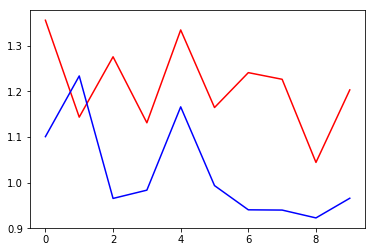

In [14]:
plt.plot(range(10), cat_data, 'r-', dog_data, 'b-')

In [15]:
# Hmmm, not sure what that means! Lets explore the data. 
# First we need to import the stats module:
from scipy import stats

# Get some descriptive stats:
print("Cat: ", stats.describe(cat_data))
print()
print("Dog: ",stats.describe(dog_data))

Cat:  DescribeResult(nobs=10, minmax=(1.0442668857999999, 1.3555525924), mean=1.2118684620500002, variance=0.009153526186521703, skewness=-0.07715694003386762, kurtosis=-0.7500190954450394)

Dog:  DescribeResult(nobs=10, minmax=(0.92273431689999996, 1.2335782461), mean=1.0211510261599999, variance=0.011505912593684777, skewness=1.0144739148855484, kurtosis=-0.46646963710067446)


In [16]:
# Ok, let's do a t-test:
print( stats.ttest_ind(cat_data, dog_data, equal_var=True) )

Ttest_indResult(statistic=4.1959580675177328, pvalue=0.00054307319489110871)


In [17]:
# I have no reason to expect these to be correlated but out of curiosity let's do a Preason's R:
print( stats.pearsonr(cat_data, dog_data) )

(0.31279741478855239, 0.37886499589020406)


### Summary of what we have done so far:
* Imported around 140MB of raw Biopak EMG data
* Detected and sorted stimuli event codes
* Analysed each stimulus presentation against its event code and a list of intervals to determine normalised EMG values
* Generated 600+ meaningful variable names
* Created an SPSS friendly results file
* Pulled out two events and plotted them
* Explored those events by means of descriptive statistics, a t-test and correlation
<h3 style="padding-bottom: 5em; padding-top: 3em;">And we did it in a few lines of Python!</h3>

<h2 style="text-align: center;">I'm bored. What else can it do?</h2>

Python is a general purpose language. It's not tied to data analysis or statistics, it can do almost anything.

I was wondering how many staff the School of Psychology has. Looking at the staff page there were quite a lot. I'm way too lazy to count them though, so I got Python to do it. Here's how...

First we need to download the [psychology staff web page](http://www.massey.ac.nz/massey/learning/departments/school-of-psychology/staff/staff-all.cfm) and get it into a Python variable. To do this we use Python's **urllib** package. This package can download a web page or any other file out on the web given a URL. 

Next we use another Python package to search the downloaded page and find the HTML elements containing the staff names. This is where it gets a bit weird: the Python package to do this is called **BeautifulSoup** (I think it must be a Monty Python reference - the language is full of them).

By using Chrome's developer tools (Ctrl-Shift-I) I found out that staff names are presented as HTML "span" elements and have been given a CSS class name of "pf_short_pname".

So, lets download the page, make soup out of it (Yep, that's what it is called) find the contents of all the "span" elements of class "pf_short_name":  

In [20]:
# We need to import urllib and BeautifulSoup

from bs4 import BeautifulSoup
import urllib.request

# get the Psychology staff web page (in ONE line of Python!)
web_page = urllib.request.urlopen('http://www.massey.ac.nz/massey/learning/departments/school-of-psychology/staff/staff-all.cfm')

# make soup!
soup = BeautifulSoup(web_page, "lxml")

# find the span elements of CSS class pf_short_name and put them in a list called 'staff':
staff = soup.find_all('span', class_ = 'pf_short_pname')

# extract the span text (ie persons name) and print it
for person in staff:
    # print their name
    print(person.string)
    
print("\nN = ", len(staff))



Prof James Liu
Amy Aldridge
Dr Siautu Alefaio - Tugia
Dr Joanne Allen
Prof Fiona Alpass
Dr Don Baken
Abi Beatson
Anita Bellamy
Dr Simon Bennett
Maria Berrett
Dr Denise Blake
Jemima Bullock
Dr Heather Buttle
Dr Peter Cannon
Prof Stuart Carr
Prof Kerry Chamberlain
Dr Leigh Coombes
Shelley Cooper
Gillian Craven
Natasha De Faria
Dr Ian de Terte
Dr Aaron Drummond
Dr John Fitzgerald
Dr Richard Fletcher
Candi Fletcher
Associate Professor Ross Flett
Dr Ruth Gammon
Emily Garden
Dr Dianne Gardner
Jhanitra Gavala
Dr Bev Haarhoff
Dr Gus Habermann
Dr Jocelyn Handy
Dr Shane Harvey
Dr Lauren Hewitt
Dr Stephen Hill
Prof Darrin Hodgetts
Dr Veronica Hopner
Dr Emma Hudson-Doyle
Hope Hyslop
Associate Professor Sarb Johal
Prof David Johnston
Dr Sara Joice
Harvey Jones
Dr Linda Jones
Dr Ella Kahu
Dr Barbara Kennedy
Fiona Kennedy
Dr Christine Kenney
Lizzy Kent
Lucia King
Pita King
Katie Knapp
Dr Ute Kreplin
Steven Langdon
Prof Janet Leathem
Prof James Liu
Malcolm Loudon
Prof Antonia Lyons
Janet Mak
Sarah Mal

<h2 style="text-align: center; padding-top: 5em;">Concluding Remarks</h2>

Twenty first century scientific software is moving away from discrete commercial products like E-Prime/MATLAB/SPSS towards open-source software ecosystems. ** Jupyter ** wraps up Python, R, data manipulation and analysis, typesetting and much more into a live document that can be shared and worked on by collaborators at a distance (using JupyterHub or GitHub).

<h4 style="text-align: center; color:  #8B6508;">  I know what you are thinking: "This is all very well but I can't afford the time to learn this kind of stuff."</h4>

Perhaps, but if you regularly need to manipulate data can you afford *not* to? Over the years I have seen graduate students and staff spend hours noodling around with Excel (or similar) hacking their data into a form they could analyse: ** when your only tool is a hammer, everything looks like a nail. **

Academia is competitive. To be competitive you need to be productive. Unless you want to work longer, being productive means using the right tools.
